## Functions and shit

In [1]:
class Ass():
    def __init__(self) -> None:
        self.kir = 1
    
    def suck(self) -> None:
        self.kir += 1

something = Ass()
something.suck()
print(something.kir)

2


In [96]:
import numpy as np
np.random.seed(42)
import torch
torch.manual_seed(42)


## Standalone Dataset Loading

In [ ]:
import torch
import torchvision
from torchvision import transforms

mnist_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))])
train_set = torchvision.datasets.MNIST('../data/mnist', download=True, train=True, transform=mnist_transforms)
test_set = torchvision.datasets.MNIST('../data/mnist', download=True, train=False, transform=mnist_transforms)
label_idxs = [np.array([], dtype=int) for i in range(10)]

for i, datapoint in enumerate(train_set):
    label_idxs[datapoint[1]] = np.append(label_idxs[datapoint[1]], int(i))

## Model Test

In [66]:
from model import simpleModel

In [105]:
test_model = simpleModel()
test_model.load_state_dict(torch.load("initial_model_weights.pth"))
test_tensor = torch.rand((1, 28*28))
test_output = test_model(test_tensor)
print(test_output)

tensor([[-2.3960, -2.2160, -2.4031, -2.1384, -2.2671, -2.2006, -2.3416, -2.4896,
         -2.3802, -2.2482]], grad_fn=<LogSoftmaxBackward0>)


In [52]:
print(np.random.randint(low=0, high=10))

9


In [8]:

sample_label = np.random.randint(low=0, high=10, size=3, dtype=int)
print(sample_label)
print(len(np.unique(sample_label)))

[6 9 4]
3


## Model Defs

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

In [3]:
class simpleModel(nn.Module):

    def __init__(self) -> None:

        super(simpleModel, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    
    def forward(self, x):

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)

        return x

In [4]:
sample_model = simpleModel()
torch.save(sample_model.state_dict(), 'initial_model_weights.pth')

## 3D Meshgrid

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

(30, 30)


Text(0.5, 0, 'z')

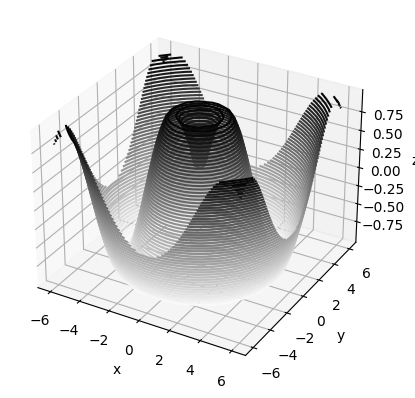

In [103]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Dataloader uniformity in selection check:

In [ ]:
print("init_label_idx_0: ", len(label_idxs[0]))
some_random_ds, label_idxs = create_client_ds(0, [1, 2], label_idxs, 200, 0.75, train_set)
print("processed_label_idx_0: ", len(label_idxs[0]))
print(len(some_random_ds))

some_random_loader = DataLoader(some_random_ds, batch_size=32, shuffle=True)


# random_ds_labels = np.array([], dtype=int)
# for data_sample in some_random_ds:
#     random_ds_labels = np.append(random_ds_labels, data_sample[1])

print(len(some_random_loader))
targets = []
for idx, (data, target) in enumerate(some_random_loader):
    if idx>1:
        break
    targets.append(target)

targets = torch.cat(targets)
print(targets.shape)
print(targets.unique(return_counts=True))

# print(np.unique(random_ds_labels, return_counts=True))

Label generator test:

In [ ]:
samples_labels = generate_random_label_set(label_idxs, 75, 12, 2)
print(samples_labels)

Dataset creation test:

In [ ]:
ds_lens = [len(label_idxs[i]) for i in range(10)]
print(ds_lens)
some_ds, label_idxs = create_client_ds(train_set, label_idxs, 100, 0.7, 3)
print(len(some_ds))
ds_lens = [len(label_idxs[i]) for i in range(10)]
print(ds_lens)
some_loader = DataLoader(some_ds, batch_size=16, shuffle=True)
targets = []
for idx, (data, target) in enumerate(some_loader):
    if idx>3:
        break
    targets.append(target)

targets = torch.cat(targets)
print(targets.shape)
print(targets.unique(return_counts=True))

Some random shit from ChatGPT

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Load the MNIST dataset
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Specify the number of clients
num_clients = 5

# Specify the preferred label for each client
preferred_labels = [0, 1, 2, 3, 4]

# Calculate the roughly equal number of samples per client for non-preferred labels
samples_per_client_non_preferred = len(mnist_dataset) // (num_clients * (len(preferred_labels) - 1))

# Calculate the number of samples for the preferred label
samples_per_client_preferred = len(mnist_dataset) - samples_per_client_non_preferred * (num_clients - 1)

# Initialize lists to store datasets for each client
client_datasets = []

# Create datasets for non-preferred labels for each client
for _ in range(num_clients - 1):
    non_preferred_dataset = [item for item in mnist_dataset if item[1] not in preferred_labels]
    non_preferred_split = random_split(non_preferred_dataset, [samples_per_client_non_preferred] * (num_clients - 1))
    client_datasets.append(non_preferred_split)

# Create datasets for the preferred label for each client
preferred_dataset = [item for item in mnist_dataset if item[1] in preferred_labels]
preferred_split = random_split(preferred_dataset, [samples_per_client_preferred] * (num_clients - 1))
client_datasets.append(preferred_split)

# Create DataLoaders for each client
client_loaders = [
    [DataLoader(client_dataset, batch_size=64, shuffle=True) for client_dataset in client_dataset_list]
    for client_dataset_list in client_datasets
]

# Example: Print the number of samples for each client
for i, loader_list in enumerate(client_loaders):
    for j, loader in enumerate(loader_list):
        print(f"Client {i+1}, Split {j+1}: {len(loader.dataset)} samples")


barplot raw code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
categories = np.array(['Category A', 'Category B', 'Category C'])
values1 = np.array([10, 15, 8])
values2 = np.array([5, 12, 6])

# Set up the figure and axis
fig, ax = plt.subplots()

# Plot bars for the first array
ax.bar(categories, values1, label='Array 1', color='blue', alpha=0.7)

# Plot bars for the second array with a slight shift on the x-axis
ax.bar(categories, values2, label='Array 2', color='orange', alpha=0.7, width=0.4, align='edge')

# Add labels and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Bar Plot of Two Arrays with Shared X-Axis')
ax.legend()

# Show the plot
plt.show()


In [106]:
import networkx as nx

In [107]:
rand_graph = nx.random_regular_graph(d=5, n=50, seed=42)

In [108]:
position = nx.circular_layout(rand_graph)

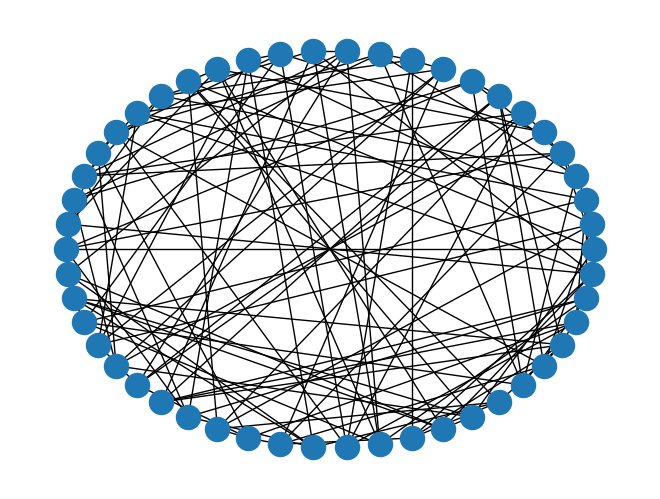

In [112]:
nx.draw_circular(rand_graph)

In [113]:
network_graph = nx.random_regular_graph(d=5, n=20, seed=42)

In [129]:
print(list(nx.neighbors(network_graph, 0))[0])

5


In [130]:
import matplotlib.pyplot as plt
import numpy as np

In [158]:
l_01_s_1 = np.genfromtxt('./results/result1/20231213_224711_lambda_0.1_local_length1/overall_acc_mean.csv', delimiter=",")
l_05_s_1 = np.genfromtxt('./results/result1/20231213_232135_lambda_0.5_local_length1/overall_acc_mean.csv', delimiter=",")
l_09_s_1 = np.genfromtxt('./results/result1/20231214_000725_lambda_0.9_local_length1/overall_acc_mean.csv', delimiter=",")

l_01_s_5 = np.genfromtxt('./results/result1/20231214_004301_lambda_0.1_local_length5/overall_acc_mean.csv', delimiter=",")
l_05_s_5 = np.genfromtxt('./results/result1/20231214_011835_lambda_0.5_local_length5/overall_acc_mean.csv', delimiter=",")
l_09_s_5 = np.genfromtxt('./results/result1/20231214_015753_lambda_0.9_local_length5/overall_acc_mean.csv', delimiter=",")

l_01_s_10 = np.genfromtxt('./results/result1/20231214_023614_lambda_0.1_local_length10/overall_acc_mean.csv', delimiter=",")
l_05_s_10 = np.genfromtxt('./results/result1/20231214_030808_lambda_0.5_local_length10/overall_acc_mean.csv', delimiter=",")
l_09_s_10 = np.genfromtxt('./results/result1/20231214_034159_lambda_0.9_local_length10/overall_acc_mean.csv', delimiter=",")

l_01_s_20 = np.genfromtxt('./results/result1/20231214_044443_lambda_0.1_local_length20/overall_acc_mean.csv', delimiter=",")
l_05_s_20 = np.genfromtxt('./results/result1/20231214_044703_lambda_0.5_local_length20/overall_acc_mean.csv', delimiter=",")
# l_09_s_10 = np.genfromtxt('./results/result1/20231214_034159_lambda_0.9_local_length10/overall_acc_mean.csv', delimiter=",")

x = [i for i in range(len(l_01_s_1))]

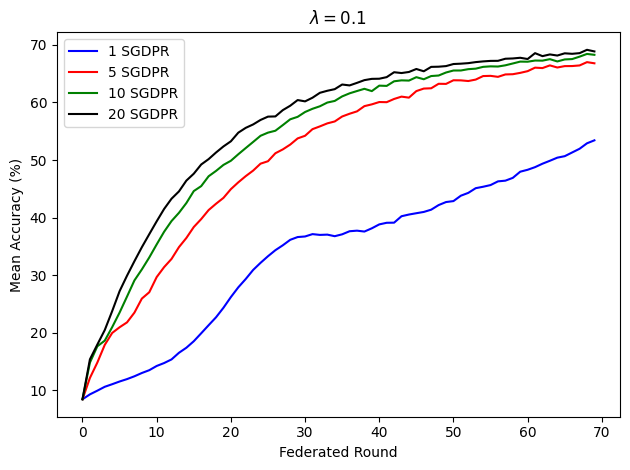

In [159]:
plt.figure()
plt.plot(x, l_01_s_1, 'b',label='1 SGDPR')
plt.plot(x, l_01_s_5, 'r',label='5 SGDPR')
plt.plot(x, l_01_s_10,'g',label='10 SGDPR')
plt.plot(x, l_01_s_20,'k',label='20 SGDPR')
plt.xlabel('Federated Round')
plt.ylabel('Mean Accuracy (%)')
plt.title('$\lambda = 0.1$')
plt.tight_layout()
plt.legend()
plt.savefig('figs/lambda_01.pdf')


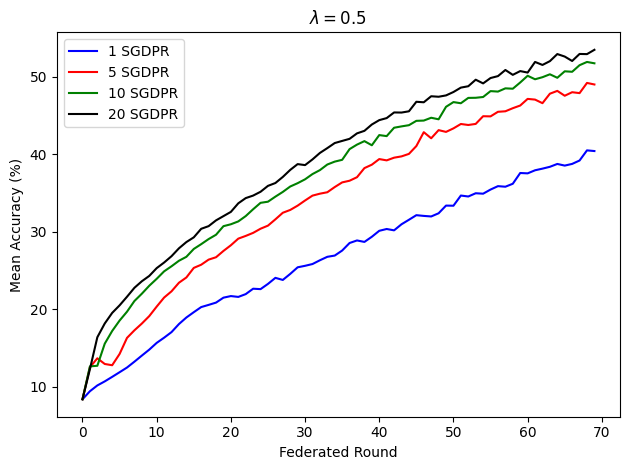

In [160]:
plt.figure()
plt.plot(x, l_05_s_1, 'b',label='1 SGDPR')
plt.plot(x, l_05_s_5, 'r',label='5 SGDPR')
plt.plot(x, l_05_s_10,'g',label='10 SGDPR')
plt.plot(x, l_05_s_20,'k',label='20 SGDPR')
plt.xlabel('Federated Round')
plt.ylabel('Mean Accuracy (%)')
plt.title('$\lambda = 0.5$')
plt.tight_layout()
plt.legend()
plt.savefig('figs/lambda_05.pdf')


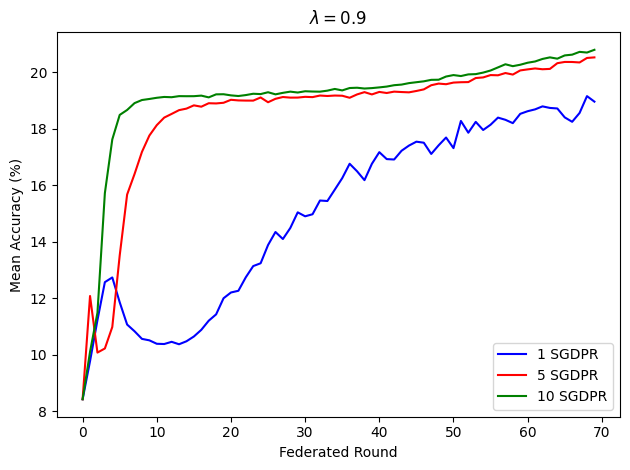

In [157]:
plt.figure()
plt.plot(x, l_09_s_1, 'b',label='1 SGDPR')
plt.plot(x, l_09_s_5, 'r',label='5 SGDPR')
plt.plot(x, l_09_s_10,'g',label='10 SGDPR')
plt.xlabel('Federated Round')
plt.ylabel('Mean Accuracy (%)')
plt.title('$\lambda = 0.9$')
plt.tight_layout()
plt.legend()
plt.savefig('figs/lambda_09.pdf')
